# Importance sampling

Let us consider $X\sim \mathcal{N}(0,1)$, what is the probability $P(X>5) = \int_5^\infty \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}dx$? The value of $P(X>5)$ is very small, one generates $\tilde{x}^{(i)} \sim \mathcal{N}(0,1)$ for $i = 1\cdots N$, the probability $P(X>5)$ can be evaluated by:
    
$$
    P(X>5) \approx \frac{1}{N} \sum_{i=1}^N \mathbb{1}_{\tilde{x}^{(i)}>5}
$$


In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

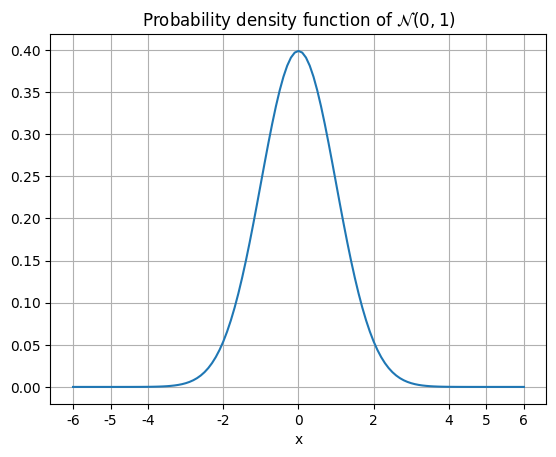

In [2]:
x = np.arange(-6, 6 + 0.1, 0.1)
y = norm.pdf(x = x, loc = 0, scale = 1)
plt.plot(x, y)
plt.xticks([-6, -5, -4, -2, 0, 2, 4, 5, 6], ['-6', '-5', '-4', '-2', '0', '2', '4', '5', '6'])
plt.title('Probability density function of ' + r'$\mathcal{N}(0,1)$')
plt.xlabel('x')
plt.grid()
plt.show()

In [3]:
# Number of samples
N = 100000  # Large N to estimate small probability accurately

# Generate N samples from N(0, 1)
samples = np.random.normal(0, 1, size=N)

# Indicator function: Check if samples > 5
indicators = samples > 5

# Estimate probability
prob_estimate = np.mean(indicators)

print(f"Monte Carlo estimate of P(X > 5): {prob_estimate}")

Monte Carlo estimate of P(X > 5): 0.0


The problem is that one try to calculate the probability of a very rare event. the simulation implemented here needs a lot of iterations to get a reasonable value of $P(X > 5)$.

One try to improve these results with importance sampling method. Let us choose the exponential density with support limited to $[5,\infty[$ as the importance density. The importance density can be written as:
    
$$
    \pi(y) = e^{-y} \frac{1}{\int_5^\infty e^{-x}dx} = e^{-(y - 5)}
$$
    
By using equation

$$
    I(f) \approx I_N(f) = \frac{\sum_{i=1}^{N} f(\tilde{x}^{(i)})  w(\tilde{x}^{(i)}) }{N}
$$

With

$$
    w(\tilde{x}^{(i)}) = \frac{p(\tilde{x}^{(i)})}{\pi(\tilde{x}^{(i)})}
$$

the estimator of the probability $P(X > 5)$ can be written:
    
$$
    P(X > 5) \approx \frac{1}{N} \sum_{i=1}^N \frac{p(\tilde{y}^{(i)})}{\pi(\tilde{y}^{(i)})} = \frac{1}{N} \sum_{i=1}^N \frac{1}{\sqrt{2 \pi}} e^{-\left(\frac{\left(\tilde{y}^{(i)}\right)^2}{2} - \tilde{y}^{(i)} + 5\right)}
$$


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\dell\AppData\Local\Temp\ipykernel_17144\3419260241.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Importance Density $\pi(x) = e^{-(x-5)}$')


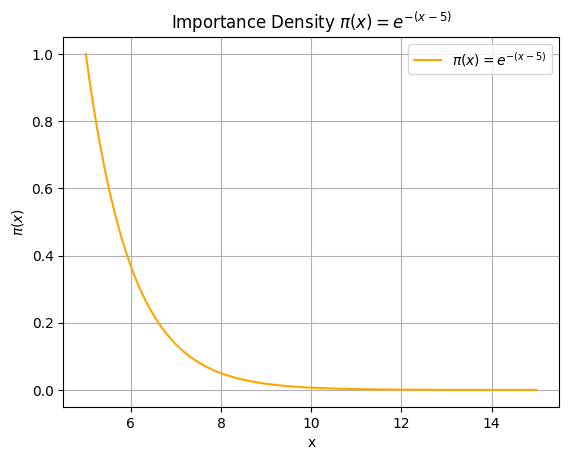

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generate x values from 5 to 15 (for illustration)
x = np.linspace(5, 15, 500)

# Compute the importance density function pi(x) = e^{-(x-5)}
pi_x = np.exp(-(x - 5))

# Plot the function
plt.plot(x, pi_x, label=r'$\pi(x) = e^{-(x-5)}$', color='orange')
plt.title('Importance Density $\pi(x) = e^{-(x-5)}$')
plt.xlabel('x')
plt.ylabel(r'$\pi(x)$')
plt.grid(True)
plt.legend()
plt.show()


https://numpy.org/doc/stable/reference/generated/numpy.arange.html

https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

In [6]:
nbSimulation = 1000
boundary = 5
y = expon.rvs(loc = 0, scale = 1, size = nbSimulation) + boundary
weight = norm.pdf(y, loc = 0, scale = 1) / expon.pdf(y - boundary, loc =0, scale = 1)
n = np.arange(start = 1,stop = nbSimulation + 1)
P = np.cumsum(weight) / nbSimulation

In [7]:
print('P(X > 5): ', P[-1])

P(X > 5):  2.827591707691058e-07


In [8]:
print('Compare this last value with the true value of P(X > 5): ', 2.87e-07)

Compare this last value with the true value of P(X > 5):  2.87e-07
